# 루브릭

In [2]:
# Load Libraries

import os, copy
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

DATA_PATH = os.getenv('HOME') + '/aiffel/object_detection/data'

print('슝=3')

슝=3


In [3]:
# Downoad KITTI Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=DATA_PATH,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('슝=3')

슝=3


# Q. (공부) - KITTI data의 bbox정보가 시각화 될 때 계산되는 방식에 대한 의문

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(6,), dtype=float32, numpy=array([-1.19, -1.52, -1.44, -1.59,  1.79, -1.47], dtype=float32)>, 'bbox': <tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.03860962, 0.14608239, 0.48104277, 0.36083198],
       [0.32302138, 0.39728594, 0.53358287, 0.4670759 ],
       [0.38315508, 0.39949918, 0.5332888 , 0.45421648],
       [0.42291445, 0.4843457 , 0.5349465 , 0.51810175],
       [0.42898396, 0.3492084 , 0.5228075 , 0.3962197 ],
       [0.43882352, 0.46210822, 0.52935827, 0.49504846]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1.41, 1.54, 3.36],
       [1.52, 1.67, 4.38],
       [1.56, 1.59, 3.65],
       [1.48, 1.47, 2.23],
       [1.45, 1.6 , 4.5 ],
       [1.5 , 1.49, 4.19]], dtype=float32)>, 'location': <tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[-2.99,  1.59,  8.12],
       [-1.41,  1.39, 16.27],
       [-2.17,  1.37

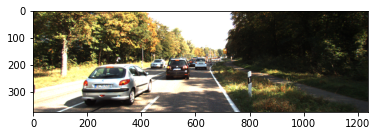

In [4]:
# Check a sample
sample = ds_train.take(1)  # Dataset.take

for example in sample:  
    print('------Example------')
    print(list(example.keys()))
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())
plt.imshow(img)
plt.show() 

- 퍼실님께, LMS node 내용 중 visualize_bbox를 구현하는 것에 대한 질의를 하였고, 이해가 되지 않는 부분을 확인하기 위해 아래 내용을 진행함

In [5]:
objects['bbox'] # min min max max : left top righ bottom
#     l, t, r, b [0 - 3]

#     left top -> xmin*w, ymax*h
#     right bottm -> xmax*w, ymin*h


<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
array([[0.03860962, 0.14608239, 0.48104277, 0.36083198],
       [0.32302138, 0.39728594, 0.53358287, 0.4670759 ],
       [0.38315508, 0.39949918, 0.5332888 , 0.45421648],
       [0.42291445, 0.4843457 , 0.5349465 , 0.51810175],
       [0.42898396, 0.3492084 , 0.5228075 , 0.3962197 ],
       [0.43882352, 0.46210822, 0.52935827, 0.49504846]], dtype=float32)>

tf.Tensor(
[[0.25026667 0.6818035  0.57957333 0.8345652 ]
 [0.34424    0.46841386 0.51616    0.53236717]
 [0.44197333 0.52940416 0.53128    0.5573027 ]
 [0.43917334 0.619066   0.54872    0.65325284]], shape=(4, 4), dtype=float32)
tf.Tensor(846.8, shape=(), dtype=float32) tf.Tensor(281.15, shape=(), dtype=float32) tf.Tensor(189.73003, shape=(), dtype=float32) tf.Tensor(123.49, shape=(), dtype=float32)
tf.Tensor(581.77, shape=(), dtype=float32) tf.Tensor(245.91, shape=(), dtype=float32) tf.Tensor(79.43001, shape=(), dtype=float32) tf.Tensor(64.47, shape=(), dtype=float32)
tf.Tensor(657.51996, shape=(), dtype=float32) tf.Tensor(209.26, shape=(), dtype=float32) tf.Tensor(34.649998, shape=(), dtype=float32) tf.Tensor(33.489994, shape=(), dtype=float32)
tf.Tensor(768.87994, shape=(), dtype=float32) tf.Tensor(210.31, shape=(), dtype=float32) tf.Tensor(42.460056, shape=(), dtype=float32) tf.Tensor(41.079998, shape=(), dtype=float32)


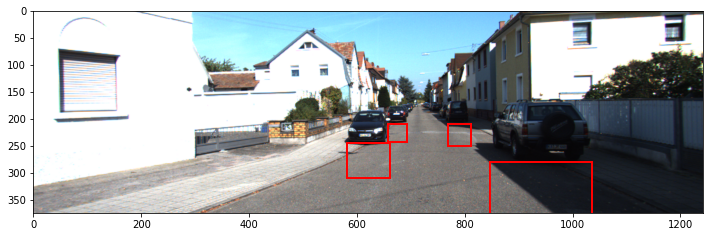

In [64]:
# cv2로 확인
import cv2
import matplotlib.patches as patches

sample = ds_train.take(1)  # Dataset.take

for ex in sample : # key : ['image', 'image/file_name', 'objects']
    image = ex["image"]
    height, width, _ = image.shape
#     print(height, width) # 375, 1242
#     print(type(image)) # <class 'tensorflow.python.framework.ops.EagerTensor'>

    # Tensor to image
    img = Image.fromarray(image.numpy())
#     print(type(img)) # <class 'PIL.Image.Image'>

    bbox = ex["objects"]['bbox']
    print(bbox)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    ax.imshow(img)    
    
    # bbox의 정보를 plot해보기
    for box in bbox :
        # x, y, w, h의 계산
        
#         x = box[0] * width
#         y = box[1] * height
#         w = (box[2] - box[0]) * width
#         h = (box[3] - box[1]) * height 

        x = box[1] * width
        y = (1 - box[0]) * height
        w = (box[3] - box[1]) * width
        h = (box[2] - box[0]) * height 
        print(x,y,w,h)
        
        rect = patches.Rectangle((x, y), # x, y, w, h
                                 w, h, 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    plt.show()


- 그림 샘플과 상관없이 고정좌표, 고정 사이즈로 그렸다.
- 이후 그려보고 있는데, 아무래도 뭔가 잘못된 것 같다.

- 문득, 제공된 기준의 문제가 있지 않을까에 대한 의심을 해보았다.
아니나다를까, KITTI의 설명과는 다르게 tfds내부의 BBOXFeature로 삽입하게 되면서 데이터의 포멧이 바뀐것을 확인할 수 있었다.
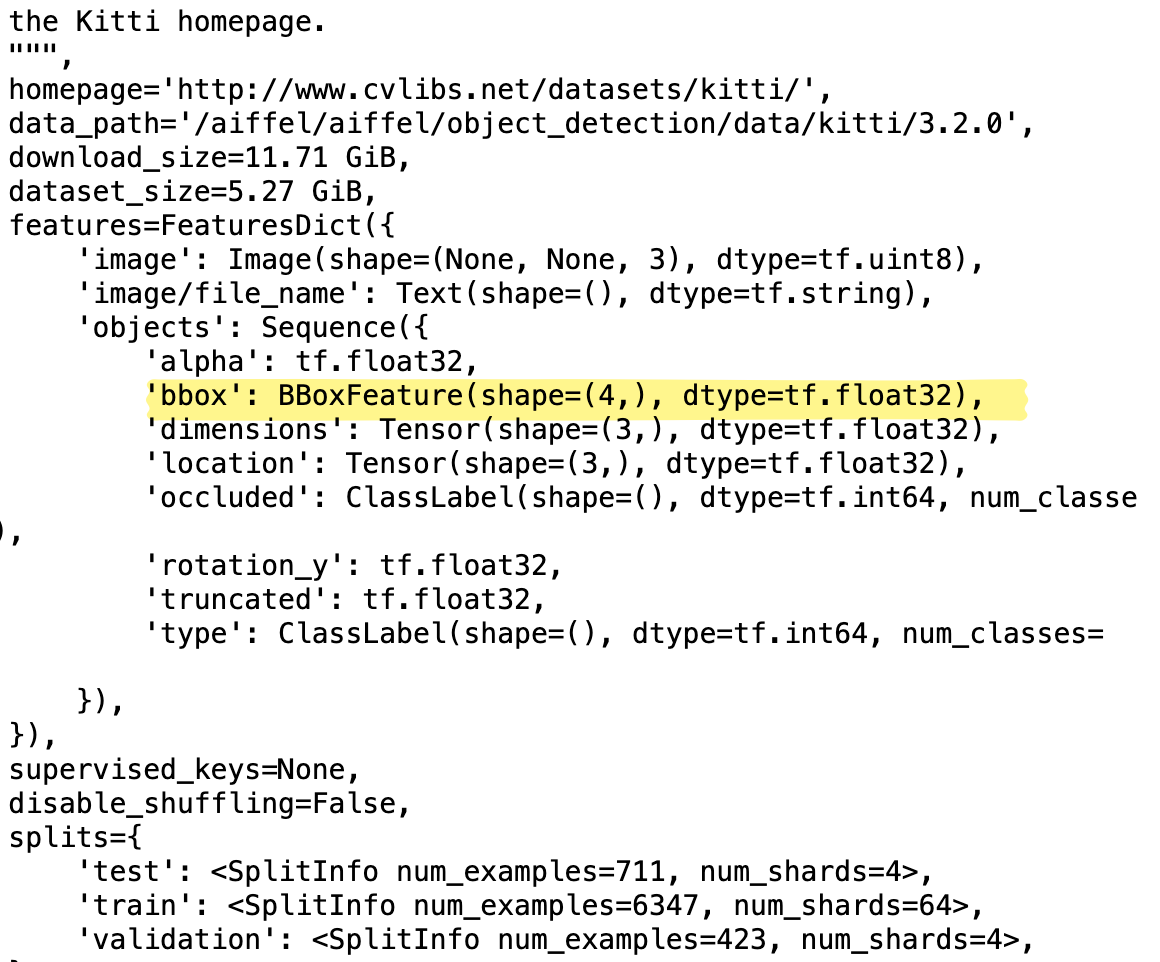

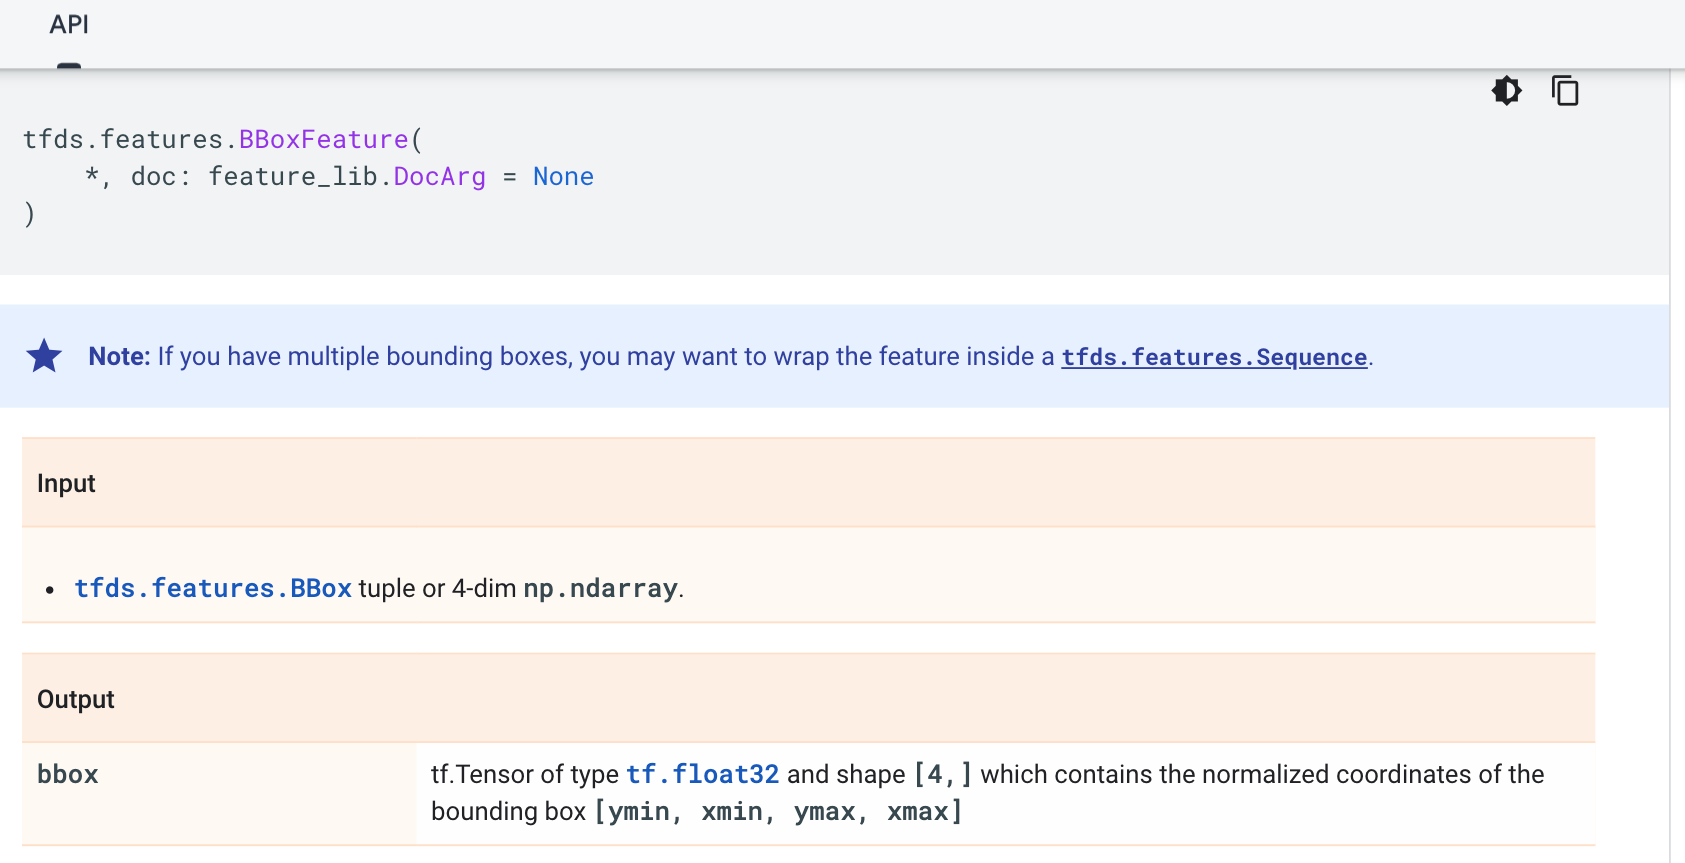

- x, y의 순서가 바뀌었던 것을 확인

In [1]:
# 파일은 docker상에서 제공 된 1epoch의 데이터로 갈음